# Natural Language Processing 

https://github.com/maryszmary/nlp-netology

# Предварительная обработка текстов

## Задача: классификация твитов по тональности

У нас есть датасет из твитов, про каждый указано, как он эмоционально окрашен: положительно или отрицательно. Задача: предсказывать эмоциональную окраску.

Классификацию по тональности используют в рекомендательных системах, чтобы понять, понравилось ли людям кафе, кино, etc.

Скачиваем куски датасета RuTweetCorp ([источник](http://study.mokoron.com/)): [датасет](https://raw.githubusercontent.com/maryszmary/netology_nlp_2021/master/sem1/tweets_sentiment.csv).

In [131]:
# можно так, а можно руками перейти по ссылке
# !wget https://raw.githubusercontent.com/maryszmary/netology_nlp_2021/master/sem1/tweets_sentiment.csv

In [132]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [133]:
df = pd.read_csv('/Users/velo1/SynologyDrive/GIT_syno/data/NLP/tweets_sentiment.csv')

In [134]:
df.head()

,text,label
0,мыс на меня обиделась:(\nя ей даже ничего не с...,negative
1,"аааааааааааааааааааа,не хочу на работу :(",negative
2,"У меня какой-то особенный вид ушей! :D, некото...",positive
3,@simonovkon он неплохой человек в жизни. Я ра...,negative
4,"RT @Darina_Lo: Домааааа\nЕхали на такси, пели ...",positive


In [135]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label, test_size=0.25, random_state=42)

In [136]:
print(df.shape)
print(x_train.shape)
print(x_test.shape)

(226834, 2)
(170125,)
(56709,)


## Baseline: классификация необработанных n-грамм

### Векторизаторы

In [137]:
df['text'].head().tolist() # side effect of using 'to_list' is  to display full text

['мыс на меня обиделась:(\nя ей даже ничего не сделала:(',
 'аааааааааааааааааааа,не хочу на работу :(',
 'У меня какой-то особенный вид ушей! :D, некоторые вакуумные наушники в моих ушах просто не держатся!',
 '@simonovkon  он неплохой человек в жизни. Я работала в шоу-бизе, со многими знакома. Встречаются очень хорошие люди. И не очень(((',
 'RT @Darina_Lo: Домааааа\nЕхали на такси, пели песни, отдыхали.\nКричали на улице:)\nМы настоящяя семья)']

In [138]:
from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор
from sklearn.feature_extraction.text import CountVectorizer

Самый простой способ извлечь фичи из текстовых данных -- векторизаторы: `CountVectorizer` и `TfidfVectorizer`

Объект `CountVectorizer` делает простую вещь:
* строит для каждого документа (каждой пришедшей ему строки) вектор размерности `n`, где `n` -- количество слов или n-грам во всём корпусе
* заполняет каждый i-тый элемент количеством вхождений слова в данный документ (суммирует)

## CountVectorizer (BOW)

In [139]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train) # bow -- bag of words (мешок слов)

`ngram_range` отвечает за то, какие n-граммы мы используем в качестве фичей:<br/>
* ngram_range=(1, 1) -- униграммы<br/>
* ngram_range=(3, 3) -- триграммы<br/>
* ngram_range=(1, 3) -- униграммы, биграммы и триграммы.

В `vec.vocabulary_` лежит словарь: мэппинг слов к их индексам:

In [140]:
sorted(list(vec.vocabulary_.items()), key=lambda x: x[1], reverse=True)[:10]


[('８d', 243643),
 ('저주인형', 243642),
 ('빅스', 243641),
 ('민호야생일축하해', 243640),
 ('동방신기와10년', 243639),
 ('雪国', 243638),
 ('逃走', 243637),
 ('空気', 243636),
 ('神戸ルミナリエ', 243635),
 ('白川郷', 243634)]

Что такое n-граммы:

In [141]:
from nltk import ngrams

In [142]:
sent = 'Harry Potter and the Methods of Rationality'.split()
list(ngrams(sent, 1)) # униграммы

[('Harry',),
 ('Potter',),
 ('and',),
 ('the',),
 ('Methods',),
 ('of',),
 ('Rationality',)]

In [143]:
list(ngrams(sent, 2)) # биграммы

[('Harry', 'Potter'),
 ('Potter', 'and'),
 ('and', 'the'),
 ('the', 'Methods'),
 ('Methods', 'of'),
 ('of', 'Rationality')]

In [144]:
list(ngrams(sent, 3)) # триграммы

[('Harry', 'Potter', 'and'),
 ('Potter', 'and', 'the'),
 ('and', 'the', 'Methods'),
 ('the', 'Methods', 'of'),
 ('Methods', 'of', 'Rationality')]

In [145]:
list(ngrams(sent, 5)) # ... пентаграммы?

[('Harry', 'Potter', 'and', 'the', 'Methods'),
 ('Potter', 'and', 'the', 'Methods', 'of'),
 ('and', 'the', 'Methods', 'of', 'Rationality')]

In [146]:
clf = LogisticRegression(random_state=42, solver='liblinear')
clf.fit(bow, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [147]:
x_test

215081    “@kasimov_d_n: @tashkentgirl Ты уже начала мне...
220754    RT @JaneAir44660366: о чем можно вообще говори...
60463     я ни когда не думал что буду так сильно скучат...
213263    @EvaKand До меня докопались они на улице по по...
113055    Не надо связываться с моей учительницей по физ...
                                ...                        
223847    ты крут:3 — ахах) Спасибо))....стараюсь:) http...
126925            ТЫ ЧЕГО СДЕЛАЛА?:( http://t.co/TW3kVuJ9FW
218198    Новогодняя дискотека в школе будет толи 26 чис...
29787     Вот почему Ли-Энн всегда недовольна, когда реч...
102184    Я только щас поняла что если завести прекрасну...
Name: text, Length: 56709, dtype: object

In [148]:
pred = clf.predict(vec.transform(x_test)) # we should use the vectorizer that we fit on the training data
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.77      0.76      0.76     28258
    positive       0.76      0.77      0.77     28451

    accuracy                           0.77     56709
   macro avg       0.77      0.77      0.77     56709
weighted avg       0.77      0.77      0.77     56709



Попробуем сделать то же самое для триграмм:

In [149]:
vec = CountVectorizer(ngram_range=(3, 3))   # trigrams
bow = vec.fit_transform(x_train)            # bow: here - bag of trigrams 
clf = LogisticRegression(random_state=42, max_iter= 200)   # classifier
clf.fit(bow, y_train)                       # train the classifier
pred = clf.predict(vec.transform(x_test))   # predict on vectorized test data
print(classification_report(pred, y_test))  # print classification report

              precision    recall  f1-score   support

    negative       0.47      0.72      0.57     18248
    positive       0.82      0.61      0.70     38461

    accuracy                           0.65     56709
   macro avg       0.64      0.66      0.63     56709
weighted avg       0.71      0.65      0.66     56709



In [150]:
vec.get_feature_names_out()[200::20]  # the first 20 features

array(['00 отъезд из', '00 подъем вконтакте', '00 проснусь совесть', ...,
       'өөрийг чинь өөрөөс', 'өөрөа их мундаг', '빅스 дебильные часы'],
      dtype=object)

## TF-IDF векторизация

`TfidfVectorizer` делает то же, что и `CountVectorizer`, но в качестве значений – tf-idf каждого слова.

Как считается tf-idf:

TF (term frequency) – относительная частотность слова в документе:
$$ TF(t,d) = \frac{n_t}{\sum_k n_k} $$

`t` -- слово (term), `d` -- документ, $n_t$ -- количество вхождений слова, $n_k$ -- количество вхождений остальных слов

IDF (inverse document frequency) – обратная частота документов, в которых есть это слово:
$$       IDF(t, D) = \log \frac{|D|}{|\{d : t \in d\}|} $$


`t` -- слово (term), `D` -- коллекция документов

Перемножаем их:
$$TFIDF_{(t,d,D)} = TF_{(t,d)} \times IDF_{(t, D)}$$

Сакральный смысл – если слово часто встречается в одном документе, но в целом по корпусу встречается в небольшом 
количестве документов, у него высокий TF-IDF.

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [152]:
vec = TfidfVectorizer(ngram_range=(1, 1), max_features=10000)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42, solver='liblinear')
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.72      0.75      0.74     27080
    positive       0.76      0.74      0.75     29629

    accuracy                           0.74     56709
   macro avg       0.74      0.74      0.74     56709
weighted avg       0.74      0.74      0.74     56709



В этот раз получилось чуть хуже :( 

Давайте попробуем разные аргументы `TfidfVectorizer`.

## Токенизация

Токенизировать -- значит, поделить текст на слова, или *токены*.

Самый наивный способ токенизировать текст -- разделить с помощью `split`. Но `split` упускает очень много всего, например, банально не отделяет пунктуацию от слов. Кроме этого, есть ещё много менее тривиальных проблем.

In [153]:
print(df['text'].iloc[0].split())

['мыс', 'на', 'меня', 'обиделась:(', 'я', 'ей', 'даже', 'ничего', 'не', 'сделала:(']


In [154]:
vec.get_feature_names_out()[:20]  # the first 20 features

array(['00', '000', '01', '02', '03', '04', '05', '06', '07', '08', '09',
       '0bkpahm6ml', '10', '100', '1000', '100500', '11', '111', '12',
       '120'], dtype=object)

Давайте попробуем разбивать текст на слова с использованием регулярных выражений.

In [155]:
import re

text = df['text'].iloc[0]
words = re.findall(r'\b\w+\b', text)
print(words)

['мыс', 'на', 'меня', 'обиделась', 'я', 'ей', 'даже', 'ничего', 'не', 'сделала']


Обычно в NLP делают так:

In [156]:
from nltk.tokenize import word_tokenize

In [157]:
example = 'Но не каждый хочет что-то исправлять:('
word_tokenize(example)

['Но', 'не', 'каждый', 'хочет', 'что-то', 'исправлять', ':', '(']

In [158]:
text = u'Is 9.5 or 525,600 my favorite number?'
word_tokenize(text)

['Is', '9.5', 'or', '525,600', 'my', 'favorite', 'number', '?']

В nltk вообще есть довольно много токенизаторов:

In [159]:
from nltk import tokenize
len(dir(tokenize)), dir(tokenize)[:16]

(58,
 ['BlanklineTokenizer',
  'LegalitySyllableTokenizer',
  'LineTokenizer',
  'MWETokenizer',
  'NLTKWordTokenizer',
  'PunktSentenceTokenizer',
  'RegexpTokenizer',
  'ReppTokenizer',
  'SExprTokenizer',
  'SpaceTokenizer',
  'StanfordSegmenter',
  'SyllableTokenizer',
  'TabTokenizer',
  'TextTilingTokenizer',
  'ToktokTokenizer',
  'TreebankWordDetokenizer'])

| Method Name                   | Description                                                                                   |
|-------------------------------|-----------------------------------------------------------------------------------------------|
| BlanklineTokenizer            | Tokenizes text based on blank lines. Useful for separating paragraphs or sections in the text. |
| LegalitySyllableTokenizer     | Tokenizes text into legal syllables (specific to a language or legal context).                 |
| LineTokenizer                 | Tokenizes text into lines (based on line breaks).                                              |
| MWETokenizer                  | Tokenizes multi-word expressions as a single token.                                            |
| NLTKWordTokenizer             | Tokenizes text into words using NLTK (Natural Language Toolkit).                              |
| PunktSentenceTokenizer        | Tokenizes text into sentences using the Punkt algorithm (part of NLTK).                       |
| RegexpTokenizer               | Tokenizes text using regular expressions (you can specify custom rules).                       |
| ReppTokenizer                 | Tokenizes text using the Repp algorithm (specific algorithm, not widely known).               |
| SExprTokenizer                | Tokenizes text into S-expressions (used in certain programming languages and linguistic structures). |
| SpaceTokenizer                | Tokenizes text based on whitespace (splits on spaces).                                         |
| StanfordSegmenter             | Tokenizes text using Stanford NLP tools (part of Stanford CoreNLP).                           |
| SyllableTokenizer             | Tokenizes text into syllables (useful for linguistic analysis).                                |
| TabTokenizer                  | Tokenizes text based on tab characters (useful for specific data formats).                     |
| TextTilingTokenizer           | Tokenizes text into subtopic regions using the TextTiling algorithm.                           |
| ToktokTokenizer               | Tokenizes text into words using the Toktok algorithm (part of NLTK).                           |
| TreebankWordDetokenizer       | Detokenizes words back into text, commonly used after tokenization in NLP pipelines.           |


In [160]:
from nltk.tokenize import toktok

toktok = toktok.ToktokTokenizer()
text = u'Is 9.5 or 525,600 my favorite number?'
print (toktok.tokenize(text, return_str=True))

Is 9.5 or 525,600 my favorite number ?


Они умеют выдавать индексы начала и конца каждого токена:

In [161]:
wh_tok = tokenize.WhitespaceTokenizer()
list(wh_tok.span_tokenize(example))

[(0, 2), (3, 5), (6, 12), (13, 18), (19, 25), (26, 38)]

(если вам было интересно, зачем вообще включать в модуль токенизатор, который работает как `.split()` :))

Некторые токенизаторы ведут себя специфично:

In [162]:
tokenize.TreebankWordTokenizer().tokenize("don't stop me")

['do', "n't", 'stop', 'me']

Для некоторых задач это может быть полезно.

А некоторые -- вообще не для текста на естественном языке (не очень понятно, зачем это в nltk :)):

In [163]:
tokenize.SExprTokenizer().tokenize("(a (b c)) d e (f)")

['(a (b c))', 'd', 'e', '(f)']

### Самые частотные слова

In [164]:
from string import punctuation
punctuation, len(punctuation), type(punctuation)

('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', 32, str)

In [165]:
%%time          
corpus = [token for tweet in df.text for token in word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:10]

2870536
CPU times: user 31.8 s, sys: 148 ms, total: 31.9 s
Wall time: 32.1 s


['мыс',
 'на',
 'меня',
 'обиделась',
 'я',
 'ей',
 'даже',
 'ничего',
 'не',
 'сделала']

In [166]:
%%time
from collections import Counter # for counting
freq_dict = Counter(corpus)

print(len(freq_dict))
# freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
freq_dict.most_common(20)

351101
CPU times: user 658 ms, sys: 22.1 ms, total: 680 ms
Wall time: 677 ms


[('не', 69472),
 ('и', 55166),
 ('в', 52902),
 ('я', 52818),
 ('RT', 38070),
 ('на', 35759),
 ('http', 32998),
 ('что', 31541),
 ('с', 27217),
 ('а', 26860),
 ('...', 22363),
 ('меня', 20656),
 ('у', 18928),
 ('как', 18280),
 ('так', 16839),
 ('D', 16575),
 ('это', 16542),
 ('мне', 16337),
 ('все', 14763),
 ('ты', 13412)]

### Закон Ципфа
Эмпирическая закономерность: если все слова корпуса текста упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n. Иными словами, частотность слов убывает очень быстро.

В любом достаточно большом тексте ранг слова обратно пропорционален его частоте: $f = \frac{a}{r}$

$f$ – частота слова, $r$  – ранг слова, $a$  – параметр, для славянских языков – около 0.07

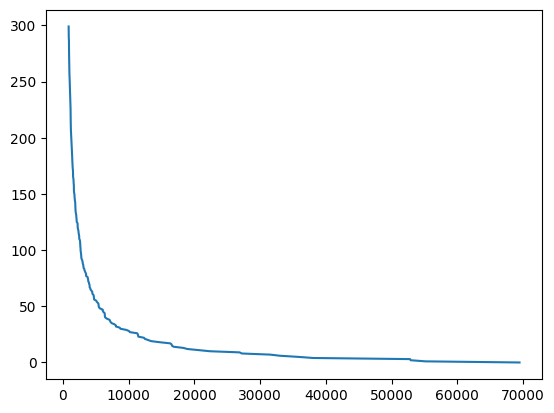

In [169]:
import matplotlib.pyplot as plt
# %matplotlib inline      

freqs = list(freq_dict.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

In [179]:
import plotly.express  as px

fig = px.scatter(x= range(300), y= freqs[:300], labels={'x': 'word rank', 'y': 'frequency'},
                 title='Zipf\'s law for English Wikipedia',  color=range(300),  )
fig.update_traces(marker=dict(size=3))
fig.update_layout(height=600)
fig.show()

### Закон Хипса

С увеличением длины текста (количества токенов), количество слов увеличивается в соответствии с законом: $|V| = K*N^b$


$N$  –  число токенов, $|V|$  – количество слов в словаре, $K, b$  –  параметры, обычно $K \in [10,100], b \in [0.4, 0.6]$

Закон Хипса -- обратная сторона закона Ципфа. Он описывает, что чем больше корпус, тем меньше новых слов добавляется с добавлением новых текстов. В какой-то момент корпус насыщается.

In [181]:
?cnt.update()

Object `cnt.update()` not found.


In [180]:
from tqdm import tqdm

cnt = Counter()
n_words = []
n_tokens = []
tokens = []
for index, row in tqdm(df.iterrows(), total = len(df)):
    tokens = word_tokenize(row['text']) # tokenize text
    cnt.update([token for token in tokens if token not in punctuation]) # update counter
    n_words.append(len(cnt))
    n_tokens.append(sum(cnt.values()))

100%|██████████| 226834/226834 [07:08<00:00, 529.61it/s]


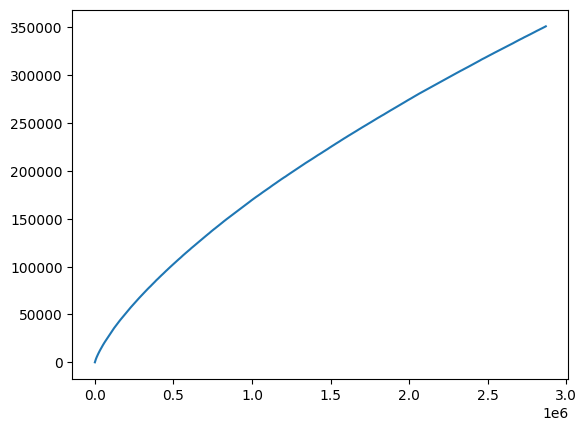

In [103]:
fig, ax = plt.subplots()
ax.plot(n_tokens, n_words)
plt.show()

## Стоп-слова и пунктуация

*Стоп-слова* -- это слова, которые часто встречаются практически в любом тексте и ничего интересного не говорят о конретном документе, то есть играют роль шума. Поэтому их принято убирать. По той же причине убирают и пунктуацию.

In [104]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/velo1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
# у вас здесь, вероятно, выскочит ошибка и надо будет загрузить стоп слова (как написано выше)
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [106]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [107]:
noise = stopwords.words('russian') + list(punctuation)

В векторизаторах за стоп-слова, логичным образом, отвечает аргумент `stop_words`.

In [108]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/Users/velo1/SynologyDrive/GIT_syno/Mac/Netology/venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/velo1/SynologyDrive/GIT_syno/Mac/Netology/venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn(
/Users/velo1/SynologyDrive/GIT_syno/Mac/Netology/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

              precision    recall  f1-score   support

    negative       0.79      0.77      0.78     28835
    positive       0.77      0.79      0.78     27874

    accuracy                           0.78     56709
   macro avg       0.78      0.78      0.78     56709
weighted avg       0.78      0.78      0.78     56709



Получилось чууть лучше. Что ещё можно сделать?

## Лемматизация

У каждого слова есть лемма (нормальная форма):

    кошке, кошку, кошкам, кошкой ⟹ кошка
    бежал, бежит, бегу ⟹ бежать
    белому, белым, белыми ⟹ белый


**Лемматизация** – это приведение разных форм одного слова к начальной форме – *лемме*. Почему это хорошо?
* Во-первых, мы хотим рассматривать как отдельную фичу каждое *слово*, а не каждую его отдельную форму.
* Во-вторых, некоторые стоп-слова стоят только в начальной форме, и без лематизации выкидываем мы только её.

Для русского есть два хороших лемматизатора: mystem и pymorphy:

### [Mystem](https://tech.yandex.ru/mystem/)
Как с ним работать:
* можно скачать mystem и запускать [из терминала с разными параметрами](https://tech.yandex.ru/mystem/doc/)
* [pymystem3](https://pythonhosted.org/pymystem3/pymystem3.html) - обертка для питона, работает медленнее, но это удобно

In [109]:
!pip install pymystem3

In [110]:
from pymystem3 import Mystem
mystem_analyzer = Mystem()

Installing mystem to /Users/velo1/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-macosx.tar.gz


Мы инициализировали Mystem c дефолтными параметрами. А вообще параметры есть такие:
* mystem_bin - путь к `mystem`, если их несколько
* grammar_info - нужна ли грамматическая информация или только леммы (по дефолту нужна)
* disambiguation - нужно ли снятие омонимии - дизамбигуация (по дефолту нужна)
* entire_input - нужно ли сохранять в выводе все (пробелы, например), или можно выкинуть (по дефолту оставляется все)

Методы Mystem принимают строку, токенизатор вшит внутри. Можно, конечно, и пословно анализировать, но тогда он не сможет учитывать контекст.

Можно просто лемматизировать текст:

In [111]:
print(mystem_analyzer.lemmatize(example))

['но', ' ', 'не', ' ', 'каждый', ' ', 'хотеть', ' ', 'что-то', ' ', 'исправлять', ':(\n']


А можно получить грамматическую информацию:

In [112]:
mystem_analyzer.analyze(example)

[{'analysis': [{'lex': 'но', 'wt': 0.9998906299, 'gr': 'CONJ='}],
  'text': 'Но'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'каждый',
    'wt': 0.9985975799,
    'gr': 'APRO=(вин,ед,муж,неод|им,ед,муж)'}],
  'text': 'каждый'},
 {'text': ' '},
 {'analysis': [{'lex': 'хотеть',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,3-л'}],
  'text': 'хочет'},
 {'text': ' '},
 {'analysis': [{'lex': 'что-то', 'wt': 1, 'gr': 'SPRO,ед,сред,неод=(вин|им)'}],
  'text': 'что-то'},
 {'text': ' '},
 {'analysis': [{'lex': 'исправлять', 'wt': 1, 'gr': 'V,пе=инф,несов'}],
  'text': 'исправлять'},
 {'text': ':(\n'}]

Давайте терепь использовать лемматизатор майстема в качестве токенизатора.

In [113]:
import re
stopwords_ru = set(stopwords.words('russian'))
stopwords_ru.update([' ', '\n'])

def my_preproc(text, stopwords = stopwords_ru):
    text = re.sub('[{}]'.format(punctuation), '', text)
    text = mystem_analyzer.lemmatize(text)
    return [word for word in text if word not in stopwords_ru]

In [114]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=my_preproc)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/Users/velo1/SynologyDrive/GIT_syno/Mac/Netology/venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/velo1/SynologyDrive/GIT_syno/Mac/Netology/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.76      0.74      0.75     28783
    positive       0.74      0.76      0.75     27926

    accuracy                           0.75     56709
   macro avg       0.75      0.75      0.75     56709
weighted avg       0.75      0.75      0.75     56709



### [Pymorphy](http://pymorphy2.readthedocs.io/en/latest/)
Это модуль на питоне, довольно быстрый, с большим количеством функций.

In [115]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

ModuleNotFoundError: No module named 'pymorphy2'

pymorphy2 работает с отдельными словами. Если дать ему на вход предложение - он его просто не лемматизирует, т.к. не понимает

In [ ]:
ana = pymorphy2_analyzer.parse(sent[3])
ana

[Parse(word='платили', tag=OpencorporaTag('VERB,impf,tran plur,past,indc'), normal_form='платить', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'платили', 2368, 10),))]

In [ ]:
ana[0].normal_form

'платить'

А теперь давайте напишем аналогичную функцию для лемматизации с pymorphy2:

Что будет, если использовать её в качестве препроцессора? 

### mystem vs. pymorphy

1) *Лучше всего пользоваться линуксом*, mystem работает невероятно медленно под windows на больших текстах.

2) *Снятие омонимии*. Mystem умеет снимать омонимию по контексту (хотя не всегда преуспевает), pymorphy2 берет на вход одно слово и соответственно вообще не умеет дизамбигуировать по контексту:

In [ ]:
homonym1 = 'За время обучения я прослушал больше сорока курсов.'
homonym2 = 'Сорока своровала блестящее украшение со стола.'
mystem_analyzer = Mystem() # инициализирую объект с дефолтными параметрами

print(mystem_analyzer.analyze(homonym1)[-5])
print(mystem_analyzer.analyze(homonym2)[0])

{'analysis': [{'lex': 'сорок', 'wt': 0.8710292664, 'gr': 'NUM=(пр|дат|род|твор)'}], 'text': 'сорока'}
{'analysis': [{'lex': 'сорока', 'wt': 0.1210970041, 'gr': 'S,жен,од=им,ед'}], 'text': 'Сорока'}


In [ ]:
sent1 = 'Действительно, на его лице не отражалось никаких чувств – ни проблеска сочувствия не было на нем, а ведь боль просто невыносима'

In [ ]:
lemmas1 = [pymorphy2_analyzer.parse(word)[0].normal_form for word in sent1.split()]
print(' '.join(lemmas1))

действительно, на он лицо не отражаться никакой чувство – ни проблеск сочувствие не быть на нем, а ведь боль просто невыносимый


In [ ]:
lemmas2 = mystem_analyzer.lemmatize(sent1)
print(''.join(lemmas2))

действительно, на его лицо не отражаться никакой чувство – ни проблеск сочувствие не быть на немой, а ведь боль просто невыносимый



### Стемминг

Слова состоят из морфем: 𝑤𝑜𝑟𝑑=𝑠𝑡𝑒𝑚+𝑎𝑓𝑓𝑖𝑥𝑒𝑠. Стемминг позволяет отбросить аффиксы. Чаще всего используется алгоритм Портера.

Алгоритм Портера состоит из 5 циклов команд, на каждом цикле – операция удаления / замены суффикса. Возможны вероятностные расширения алгоритма.

In [ ]:
from nltk.stem.snowball import RussianStemmer

stemmer = RussianStemmer()
words = ['распределение', 'приставить', 'сделала', 'словообразование']
for w in words:
    stem = stemmer.stem(w)
    print(stem)

распределен
пристав
сдела
словообразован


## О важности эксплоративного анализа

Но иногда пунктуация бывает и не шумом -- главное отталкиваться от задачи. Что будет если вообще не убирать пунктуацию?

In [ ]:
vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/home/anyala/miniconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     27946
    positive       1.00      1.00      1.00     28763

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709



Стоило оставить пунктуацию -- и все метрики равны 1! Как это получилось? Среди неё были очень значимые токены (как вы думаете, какие?). Найдите фичи с самыми большими коэффициэнтами:

Посмотрим, как один из супер-значительных токенов справится с классификацией безо всякого машинного обучения:

In [ ]:
cool_token = 
pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      0.85      0.92     32916
    positive       0.83      1.00      0.91     23793

    accuracy                           0.91     56709
   macro avg       0.91      0.92      0.91     56709
weighted avg       0.93      0.91      0.91     56709



## Символьные n-граммы

Теперь в качестве фичей используем, например, униграммы символов:

In [ ]:
vec = CountVectorizer(analyzer='char', ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

   negative       0.99      1.00      1.00     27667
   positive       1.00      0.99      1.00     29042

avg / total       1.00      1.00      1.00     56709



В общем-то, теперь уже понятно, почему на этих данных здесь 1. Так или инчае, на символах классифицировать тоже можно: для некторых задач (например, для определения языка) фичи-символьные n-граммы оказываются очень значимыми.

Ещё одна замечательная особенность фичей-символов: токенизация и лемматизация не нужна, можно использовать такой подход для языков, у которых нет готвых анализаторов.

## Сегментация предложений

Знаки ".", "?", "!" не всегда однозначно определяют границы предложений.

Бинарный классификатор для сегментации предложений: для каждой точки "." определить, является ли она концом предложения или нет.

In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
!pip install rusenttokenize

In [ ]:
from rusenttokenize import ru_sent_tokenize


In [ ]:
text = 'Эта шоколадка за 400р. ничего из себя не представляла. В г. 2019 Артём решил больше не ходить в этот магазин на берегу р. Москвы.'



sents = sent_tokenize(text)

print(len(sents))
print(*sents, sep='\n')

print()
sents = ru_sent_tokenize(text)

print(len(sents))
print(*sents, sep='\n')

4
Эта шоколадка за 400р.
ничего из себя не представляла.
В г.
2019 Артём решил больше не ходить в этот магазин на берегу р. Москвы.

3
Эта шоколадка за 400р. ничего из себя не представляла.
В г. 2019 Артём решил больше не ходить в этот магазин на берегу р.
Москвы.


## Регулярные выражения
Вообще, часто бывает так, что для конкретного случая нужен особый способ токенизации, и надо самостоятельно написать регулярку. Или, например, перед работой с текстом, надо почистить его от своеобразного мусора: упоминаний пользователей, url и так далее.

Навык полезный, давайте в нём тоже потренируемся.

In [ ]:
import re

__*Классы символов:*__

__[A-Z]__ – символы верхнего регистра (латиница)

__[a-z]__ – символы нижнего регистра (латиница)

__[А-Я]__ – символы верхнего регистра (кириллица)

__[а-я]__ – символы нижнего регистра (кириллица)

__[0-9]__ или __\d__ – цифра

__[^0-9]__ или __\D__ – любой символ, кроме цифры

__.__ – любой символ


__*Служебные символы:*__

__\t__ – табуляция

__\s__ – любой пробельный символ

__\S__ – все символы, кроме пробельных

__\n__ – перенос строки

__^__ – начало строки

__$__ – конец строки

__\__ – экранирование

__*Операторы:*__

__?__ - предыдущий символ/группа может быть, а может не быть

__+__ - предыдущий символ/группа может повторяться 1 и более раз

__*__ - предыдущий символ/группа может повторяться 0 и более раз

__{n,m}__ - предыдущий символ/группа может повторяться от от n до m включительно

__{n,}__ - предыдущий символ/группа в скобках может повторяться n и более раз

__{,m}__ - предыдущий символ/группа может повторяться до m раз

__{n}__ - предыдущий символ/группа повторяется n раз

Внутри групп не работают операторы __.__, __+__, __*__, их необходимо экранировать с помощью обратного слеша: \

### findall
возвращает список всех найденных совпадений

In [ ]:
result = re.findall('ab+c.', 'abcdefghijkabcabcxabc') 
print(result)

['abcd', 'abca']


Вопрос на внимательность: почему нет abcx?

**Задание**: вернуть список первых двух букв каждого слова в строке, состоящей из нескольких слов.

In [ ]:
text = 'Кот сидит на столе'


### split
разделяет строку по заданному шаблону


In [ ]:
result = re.split(',', 'itsy, bitsy, teenie, weenie') 
print(result)

['itsy', ' bitsy', ' teenie', ' weenie']


Можно указать максимальное количество разбиений

In [ ]:
result = re.split(',', 'itsy, bitsy, teenie, weenie', maxsplit = 2) 
print(result)

['itsy', ' bitsy', ' teenie, weenie']


**Задание**: разбейте строку, состоящую из нескольких предложений, по точкам, но не более чем на 3 предложения.

### sub
ищет шаблон в строке и заменяет все совпадения на указанную подстроку

параметры: (pattern, repl, string)

In [ ]:
result = re.sub('a', 'b', 'abcabc')
print (result)

bbcbbc


**Задание**: напишите регулярку, которая заменяет все цифры в строке на "DIG".

**Задание**: напишите регулярку, которая убирает url из строки.

### compile
компилирует регулярное выражение в отдельный объект

In [ ]:
# Пример: построение списка всех слов строки:
prog = re.compile('[А-Яа-яё\-]+')
prog.findall("Слова? Да, больше, ещё больше слов! Что-то ещё.")

['Слова', 'Да', 'больше', 'ещё', 'больше', 'слов', 'Что-то', 'ещё']

**Задание**: для выбранной строки постройте список слов, которые длиннее трех символов.

**Задание**: вернуть список доменов (@gmail.com) из списка адресов электронной почты:

```
abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz
```

Если всё ещё осталось время: [регулярочный кроссворд ¯\_(ツ)_/¯](https://mariolurig.com/crossword/)